# SQL. Зачем нужен этот модуль?

Для правильной работы сайта или приложения нужны не только файлы с кодом страниц, но и базы данных. 

Для взаимодействия с базами данных используются системы управления базами данных.  В качестве языка запросов к базе данных используется SQL.

В этом модуле вы узнаете о базах данных и СУБД, их разновидностях и основных отличиях, а так же попробуете поработать с ними.
   
# Определения

**База данных (БД)** - это взаимосвязанная информация (данные) об объектах, которая организована специальным образом и хранится на каком-либо носителе.

**Система управления базами данных (СУБД)** – это комплекс программно-языковых средств, позволяющих создать базы данных и управлять данными.

**SQL (Structured Query Language** – «Структурированный язык запросов») – это структурированный язык запросов, применяемый для создания, модификации и управления данными в базах данных.

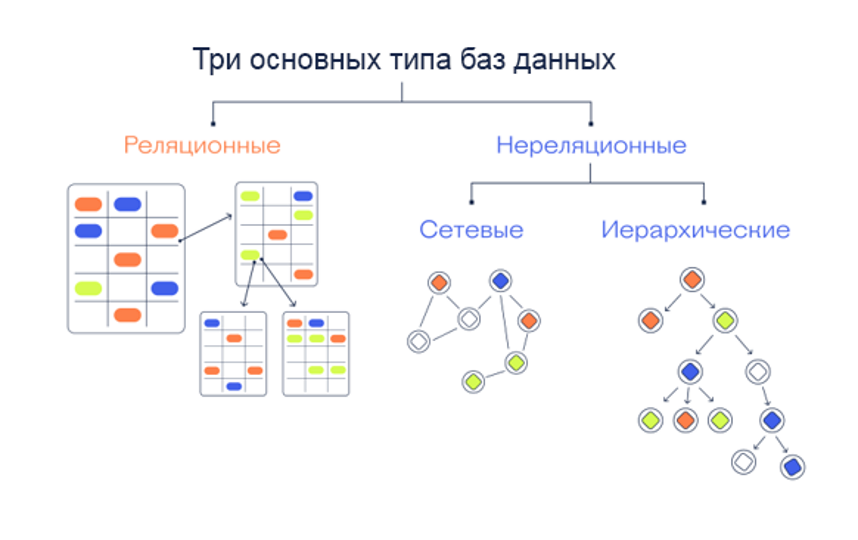

Установка postgres на Линукс: https://www.digitalocean.com/community/tutorials/how-to-install-postgresql-on-ubuntu-20-04-quickstart

# Реляционные

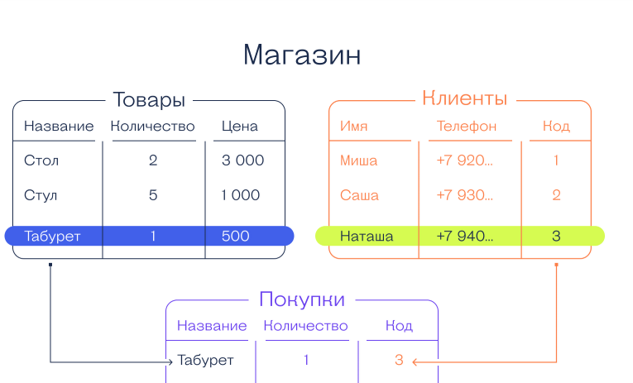

# Сетевые

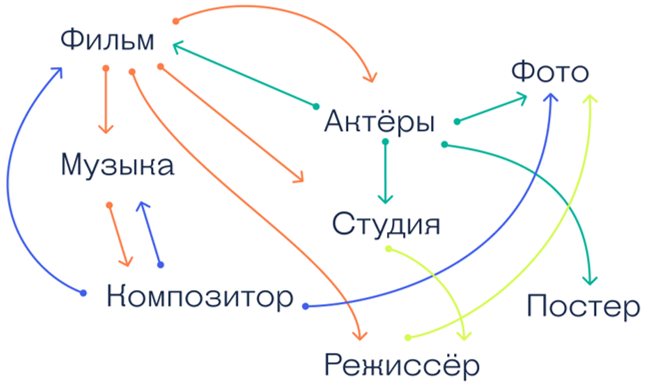

# Иерархические

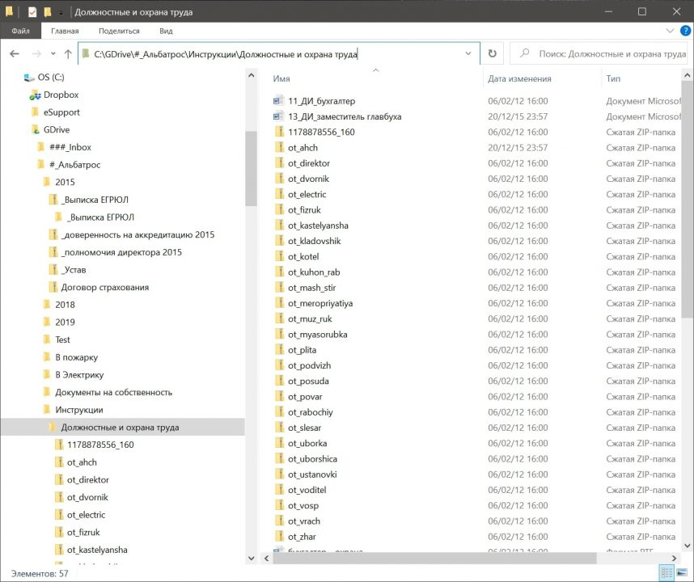

# NoSQL

**NoSQL** - это подход к реализации масштабируемого хранилища (базы) информации с гибкой моделью данных, отличающийся от классических реляционных СУБД. 

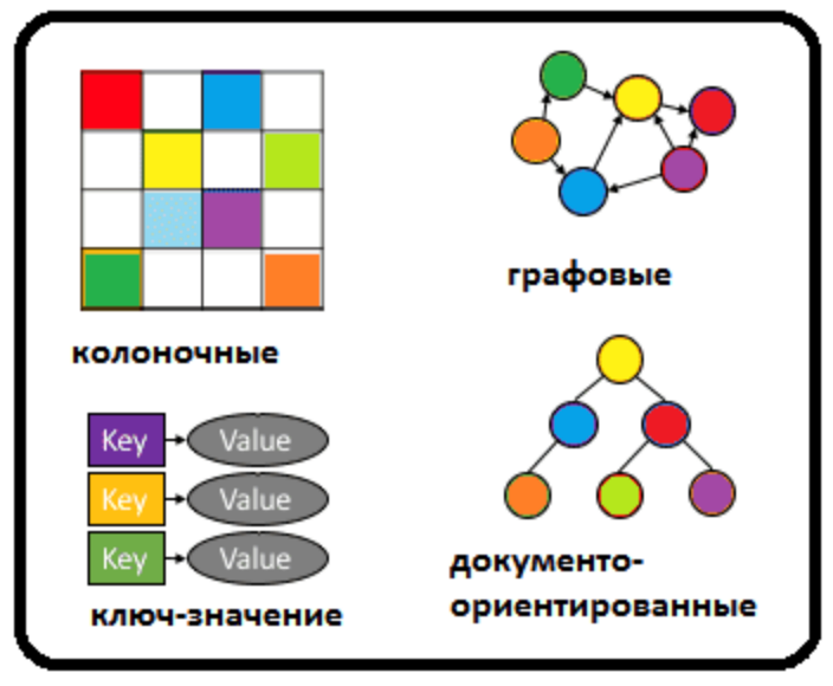

# Классификация БД по среде хранения
## Вторичная память

Хранение данных во вторичной памяти, или традиционная средой постоянного хранения является периферийная энергонезависимая память (вторичная память) — как правило жёсткий диск. В оперативную память СУБД помещает лишь данные для текущей обработки

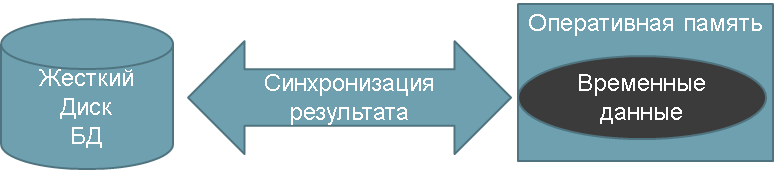

## Оперативная память

Хранение данных в оперативной памяти все данные на стадии исполнения находятся в оперативной памяти.

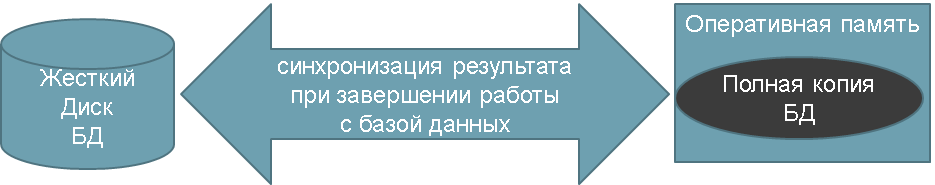

# ПО

https://www.pgadmin.org/download/
    

# Типы данных в SQL

- Числовые типы данных (целые и дробные числа):
    INT, NUMBER, FLOAT, DECIMAL
- Строковые типы данных:
    STRING, TEXT, VARCHAR
- Календарные типы данных (дата и время):
    DATE, TIME, DATETIME, TIMESTAMP

# Запросы 

## Операторы SELECT и FROM

Оператор **SELECT** осуществляет выборку из (**FROM**) базы данных. 
Вводить данные в запрос можно как строчными, так и прописными буквами. Пробелы и табуляция не повлиляют на запрос.
При этом столбцы и строки результирующего набора не упорядочены.

    SELECT *
    FROM <TABLE_NAME> ;

Чтобы упорядочить поля результирующего набора, их следует перечислить через запятую в нужном порядке после слова **SELECT** (вертикальная выборка):
    
    select <column_name1>, <column_name2>, …
    from <table_name> ;
    
 ### Примеры  
    
    SELECT
        NAME, 
        CATEGORY
    FROM 
        PRODUCTS ;

    SELECT store_id, address
    FROM stores;

    SELECT *
    FROM customer ;
    
Выборка может содержать дубликаты строк в том случае, если она не содержит потенциального ключа, однозначно определяющего запись. Если требуется получить только уникальные строки (скажем, нас интересуют только уникальные комбинации названий и категорий продуктов), то можно использовать ключевое слово **DISTINCT**:
    
    SELECT DISTINCT name, category
    FROM products ;
    
Помимо **DISTINCT** может применяться также ключевое слово **ALL** (все строки), которое принимается по умолчанию.

## Оператор ORDER BY

Чтобы упорядочить строки результирующего набора, можно выполнить сортировку по любому количеству полей, указанных в предложении **SELECT**. Для этого используется предложение **ORDER BY** список полей. Поля в списке должды бать указаны в операторе **SELECT**. При этом в списке полей могут указываться как имена полей, так и их порядковые позиции в списке предложения **SELECT**. 
Сортировку можно проводить по возрастанию (параметр **ASC** принимается по умолчанию) или по убыванию (параметр **DESC**).
    
 ### Примеры
    
    SELECT DISTINCT name, brand 
    FROM products 
    ORDER BY brand DESC ;


Допустим, нам интересно сравнить, как изменялись цены на товар по месяцам, вне зависимости от года. Тогда нам нужно отсортировать цены по месяцу+дате появления цены.

    SELECT DISTINCT
        product_id,
        price,
	    EXTRACT(MONTH FROM start_date) price_month,
        EXTRACT(DAY FROM start_date) price_day
    FROM prices 
    ORDER BY product_id, price_month, price_day

## Оператор LIMIT и OFFSET

Оператор **LIMIT** отбирает указанную часть из запроса. 

Оператор **OFFSET** используется с оператором **LIMIT**, и исключает указанную часть, сдвигая нашу выборку ниже по таблице.

Например, выведем 5 самых дорогих товаров:

    SELECT product_id, price
    FROM prices
    WHERE start_date >= '2022-08-30'
    ORDER BY price DESC
    LIMIT 5 ;
    
С помощью **LIMIT** можно делать смещение (**OFFSET**).

Например, выведем не первые 5 самых дорогих товаров, а следующую пятерку.

    SELECT product_id, price 
    FROM prices 
    WHERE start_date >= '2022-08-30'
    ORDER BY price DESC 
    LIMIT 5, 5 ;
    
    SELECT product_id, price 
    FROM prices 
    WHERE start_date >= '2022-08-30'
    ORDER BY price DESC 
    LIMIT 5 
    OFFSET 5 ;
    
## Оператор WHERE

Горизонтальную выборку реализует предложение **WHERE <предикат>**, которое записывается после предложения **FROM**. При этом в результирующий набор попадут только те строки из источника записей, для каждой из которых значение предиката равно **TRUE**. То есть предикат проверяется для каждой записи. 
Например, запрос «получить информацию какие продукты и в каких категориях выпускаются под маркой ***МАРКА***» можно сформулировать следующим образом:

    SELECT name, category
    FROM products
    WHERE brand = 'Вкус' ;
    
Символьные строки и константы типа дата/время записываются в апострофах.

В предложении **WHERE** можно использовать:

1. *Стандартные операции сравнения*

- «<» (меньше чем)

- «=» (равно)

- «>» (больше)

- «>=» (больше или равно)

- «<=» (меньше или равно)

- «<>» (не равно)

Выражения в предикатах сравнения могут содержать константы и любые поля из таблиц, указанных в предложении **FROM**. 
    
2. *Числовой диапазон*

- **BETWEEN** … **AND** …    Число входит в числовой диапазон (включая диапазон, указанный в операторе)

- **NOT BETWEEN** … **AND** …    Число не входит в числовой диапазон (включая диапазон, указанный в операторе)

3. *Числовой список*
   
- **IN** (…)    Включение числа в числовой список

- **NOT IN** (…)   Исключение числа из числового списка

4. *Операторы* ***AND*** *и* ***OR***

- Оператор **AND** показывает результат при выполнении одновременно нескольких условий.

- Оператор **OR** показывает результат при выполнении хотя бы одного из нескольких условий.
 
5. *Предикат* ***LIKE*** *и* ***NOT LIKE***

- **LIKE** 'abc%'    Любые строки, которые начинаются с букв «abc»

- **LIKE** 'abc_'    Строки длиной строго 4 символа, причем первыми символами строки должны быть «abc»

- **LIKE** '%z'    Любая последовательность символов, которая обязательно заканчивается символом «z»

- **LIKE** '%Rostov%'    Любая последовательность символов, содержащая слово «Rostov» в любой позиции строки

- **LIKE** '% % %'    Текст, содержащий не менее 2-х пробелов, например, "World Wide Web"

Если искомая строка содержит трафаретный символ, то следует задать управляющий символ в предложении **ESCAPE**. Этот управляющий символ должен использоваться в образце перед трафаретным символом, сообщая о том, что последний следует трактовать как обычный символ. Например, если в некотором поле следует отыскать все значения, содержащие символ «_», то шаблон ‘%_%’ приведет к тому, что будут возвращены все записи из таблицы. В данном случае шаблон следует записать следующим образом:

**LIKE** '%#_%' ESCAPE '#'

Истинностное значение предиката LIKE присваивается в соответствии со следующими правилами:
 
- если либо проверяемое значение, либо образец, либо управляющий символ есть **NULL**, истинностное значение нельзя установить;

- в противном случае, если проверяемое значение и образец имеют нулевую длину, истинностное значение равно **TRUE**;

- в противном случае, если проверяемое значение соответствует шаблону, то предикат **LIKE** равен **TRUE**;

- если не соблюдается ни одно из перечисленных выше условий, предикат **LIKE** равен **FALSE**.

6. *Отбор и исключение* ***NULL***

- Значение NULL – пустая ячейка.

- Отбор и исключение пустых строк производится следующим образом: **IS/IS NOT NULL**. Важно помнить, что всегда выполняется **NULL != NULL**!!!

### Примеры

    SELECT *
    FROM sales
    WHERE store_id IN ('592', '234')
    AND customer_id is null ;

    SELECT *
    FROM prices
    WHERE start_date BETWEEN '2022-01-04' AND '2022-12-27'
    OR price >= 10000 ;

    SELECT name, surname
    FROM customers
    WHERE customer_id = 28 ;

    
    SELECT *
    FROM stores
    WHERE store_id IN (1,2,3,4,5,6,7,8,9,10)
    OR region IN (0,2) ;

    SELECT *
    FROM products
    WHERE brand LIKE 'К%'
    AND name NOT LIKE '%вес%';
    
## Агрегатные функции

- **COUNT(*)**	  Возвращает количество строк источника записей
- **COUNT()**       Возвращает количество полученных значений
- **AVG()**         Возвращает среднее арифметическое значение
- **SUM()**         Возвращает сумму значений
- **MIN()**         Возвращает минимальное значение
- **MAX()**         Возвращает максимальное значение
    
При этом функции **COUNT**, **MIN** и **MAX** применимы к данным любого типа, в то время как **SUM** и **AVG** используются только для данных числового типа. Разница между функцией **COUNT(*)** и **COUNT**(имя столбца | выражение) состоит в том, что вторая (как и остальные агрегатные функции) при подсчете не учитывает **NULL** -значения.

Агрегатные функции могут использоваться отдельно от оператора **GROUP BY**, но только в том случае, если применяются к единственному атрибуту в таблице или сразу ко всей таблице. Во всех остальных случаях использование **GROUP BY** необходимо.

Агрегатные функции НИКОГДА не применяются в условиях **WHERE**. Для их применения в условии используется ИЛИ вложенный запрос, ИЛИ оператор вспомогательного условия **HAVING**.

### Примеры
    
    SELECT count(*)
    FROM products ;
    
    SELECT count(distinct region)
    FROM stores ;
    
    SELECT AVG(price)
    FROM prices
    where product_id = 184 ;
    
    SELECT min(price), max(price), avg(price)
    FROM prices ;
    
## Оператор GROUP BY

Предложение **GROUP BY** используется для определения групп выходных строк, к которым могут применяться агрегатные функции. Если это предложение отсутствует, и используются агрегатные функции, то все столбцы с именами, упомянутыми в **SELECT**, должны быть включены в агрегатные функции, и эти функции будут применяться ко всему набору строк, которые удовлетворяют предикату запроса. В противном случае все столбцы списка **SELECT**, не вошедшие в агрегатные функции, должны быть указаны в предложении **GROUP BY**. 

В результате чего все выходные строки запроса разбиваются на группы, характеризуемые одинаковыми комбинациями значений в этих столбцах.После чего к каждой группе будут применены агрегатные функции. 
Следует иметь в виду, что для **GROUP BY** все значения **NULL** трактуются как равные, то есть при группировке по полю, содержащему **NULL**-значения, все такие строки попадут в одну группу.

Если при наличии предложения **GROUP BY**, в предложении **SELECT** отсутствуют агрегатные функции, то запрос просто вернет по одной строке из каждой группы. Эту возможность, наряду с ключевым словом **DISTINCT**, можно использовать для исключения дубликатов строк в результирующем наборе.

### Примеры
    
    SELECT COUNT(product_id), category
    FROM products
    GROUP BY category ;
    
    SELECT
        sale_date,
        COUNT(distinct customer_id) as n_customers,
	    COUNT(product_id) as n_products
    FROM sales
    WHERE sale_date < '2019-02-01'
    GROUP BY sale_date;
    
## Оператор HAVING

Если предложение **WHERE** определяет предикат для фильтрации строк, то предложение **HAVING** применяется после группировки для определения аналогичного предиката, фильтрующего группы по значениям агрегатных функций. 
Это предложение необходимо для проверки значений, которые получены с помощью агрегатной функции не из отдельных строк источника записей, определенного в предложении **FROM**, а из групп таких строк. Поэтому такая проверка не может содержаться в предложении **WHERE**.

Например, вывести список из id продуктов, у которых средняя цена за 2022 год около 17000:

    SELECT avg(price), product_id
    FROM prices
    WHERE start_date >= '2022-01-01' AND start_date <= '2022-12-31'
    GROUP BY product_id
    HAVING round(avg(price) , -3) = 17000 
    
Найти максимальную, минимальную и среднюю цену на товары при условии, что минимальная цена превышает 1000:

    SELECT min(price), max(price), avg(price)
    FROM prices
    HAVING min(price) > 1000 ;
    
## Аналитические функции

Аналитическая или оконная функция - функция вычисляется над некоторым окном строк. 

- **OVER** – перед вами аналитическая функция.
- **PARTITION BY** – разбивает строки на независимые группы.
- **ORDER BY** – задает порядок строк для вычисления функции.

Оконные функции делятся на:

1. *Агрегирующие*

- **COUNT(*)**	  Возвращает количество строк источника записей
- **COUNT()**       Возвращает сумму полученных значений
- **AVG()**         Возвращает среднее арифметическое значение
- **SUM()**         Возвращает сумму значений
- **MIN()**         Возвращает минимальное значение
- **MAX()**         Возвращает максимальное значение
    
2. *Ранжирующие*

- **ROW_NUMBER()**  Возвращает последовательность ранг (порядковый номер) строк внутри партиции, НЕЗАВИСИМО от того, есть ли в строках повторяющиеся значения или нет
- **RANK()**        Возвращает ранг каждой строки внутри партиции. Если есть повторяющиеся значения, функция возвращает одинаковый ранг для таких строчек, пропуская при этом следующий числовой ранг
- **DENSE_RANK()**  Возвращает ранг, но в случае одинаковых значений не пропускает следующий числовой ранг, а идет последовательно
- **NTILE()**       Возвращает номер группы, в которую попадает соответствующая строка результирующего набора
- **CUME_DIST()**   Возвращает кумулятивное распределение величины в пределах набора значений. Она представляет количество строк со значениями, меньшими или равными значению этой строки, деленному на общее количество строк

3. *Функции смещения*

- **LAG()**         Возвращает предыдущее значение столбца по порядку сортировки
- **LEAD()**        Возвращает следующее значение столбца по порядку сортировки
- **FIRST_VALUE()** Возвращает первое значение столбца в указанной партиции
- **LAST_VALUE()**  Возвращает последнее значение столбца в указанной партиции
- **NTH_VALUE(,n)** Возвращает n-ое значение в упорядоченном наборе значений из аналитического окна

### Примеры

    SELECT 
        p.*,
        ROW_NUMBER() OVER (PARTITION BY p.brand ORDER BY p.name) RN
    FROM products p;
    
    SELECT 
        product_id,
        start_date,
        price,
        MIN(price) OVER (PARTITION BY start_date) as min_price_date,
        MIN(price) OVER (PARTITION BY product_id) as min_price_product
    FROM prices p
    ORDER BY product_id, start_date ;

Аналитические функции вычисляются на итоговой выборке – только в SELECT или ORDER BY.

Если нужно отфильтровать по значению функции, то делайте подзапрос.
О подзапросах вы узнаете на следующем занятии.

# Источники

- https://thecode.media/mysql-uroot-p/
- https://sites.google.com/site/raznyeurokipoinformatiki/home/bazy-dannyh/teoria-po-bazam-dannyh/klassifikacia-baz-dannyh-po-srede-hranenia
- http://www.sql-tutorial.ru/ru/book_sql_dml.html